# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** [Your Name]

**Dataset:** [Your Dataset Name]

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [52]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

Crop_Yield_ton_per_hectare - this is the yield of crops in kg/ha

---

### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

Agriculture industry and food policy makers would benefit knowing early how much crops (in tons) can be expected knowing the size of the land (in hectare). Early, data-driven yield forecasting can support precision agriculture and sustainable farming. It also helps to ensure food security, to optimize resource allocation, and to inform evidence-based agricultural policies.

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

1. Different crops grow differently and weigh differently. Therefore ["Crop_Type"] is important.
2. Soil Properties are important: ["Soil_pH", "Soil_Type", "N", "P", "K", "Soil_Moisture"]
3. Weather: ["Temperature", "Humidity", "Sunlight_Hours", "Wind_Speed"]
4. Water: ["Rainfall", "Irrigation_Type"]
5. Environment: ["Region", "Season", "Altitude"]
6. Farm Management: ["Fertilizer_Used", "Pesticide_Used"]

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [53]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('../data/raw/crop-yield.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 8,367 rows, 20 columns

Column names:
['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Soil_Type', 'Organic_Carbon', 'Temperature', 'Humidity', 'Rainfall', 'Sunlight_Hours', 'Wind_Speed', 'Region', 'Altitude', 'Season', 'Crop_Type', 'Irrigation_Type', 'Fertilizer_Used', 'Pesticide_Used', 'Crop_Yield_ton_per_hectare']


In [54]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:
df.head()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,7.73,15.96,Central,36,Rabi,Maize,Canal,223.48,23.36,11.42
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,9.25,12.60,North,1561,Rabi,Potato,Canal,161.54,4.42,23.19
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,8.50,15.63,North,1870,Rabi,Rice,Rainfed,184.62,6.29,7.94
3,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,8.00,7.44,Central,1143,Zaid,Wheat,Rainfed,72.69,15.37,6.72
4,50,29,22,6.87,32.73,Silt,1.20,13.88,68.91,1993.65,10.17,11.25,East,1739,Kharif,Rice,Canal,335.80,3.80,8.67


In [55]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

# YOUR CODE HERE:
df.tail()

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Region,Altitude,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
8362,154,91,93,5.86,15.98,Silt,1.08,29.54,40.82,1876.08,9.79,4.62,East,1189,Rabi,Wheat,Drip,208.91,0.54,9.16
8363,110,46,131,6.74,21.27,Loamy,1.57,39.12,67.42,2365.37,4.95,3.42,North,1299,Zaid,Potato,Sprinkler,159.19,11.93,24.04
8364,114,77,120,4.83,57.01,Loamy,0.80,24.11,41.46,642.71,8.51,11.52,South,349,Zaid,Rice,Sprinkler,134.88,7.45,7.54
8365,80,21,64,7.22,34.04,Loamy,0.85,35.20,78.31,850.20,10.26,2.20,East,1630,Rabi,Wheat,Rainfed,191.11,12.02,8.87
8366,98,75,40,6.41,19.19,Loamy,0.58,22.26,67.21,534.96,5.77,6.84,Central,741,Zaid,Rice,Canal,132.92,7.37,7.47


### 2.2 Data Types and Info

In [56]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

# YOUR CODE HERE:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   N                           8367 non-null   int64  
 1   P                           8367 non-null   int64  
 2   K                           8367 non-null   int64  
 3   Soil_pH                     8367 non-null   float64
 4   Soil_Moisture               8367 non-null   float64
 5   Soil_Type                   8367 non-null   object 
 6   Organic_Carbon              8367 non-null   float64
 7   Temperature                 8367 non-null   float64
 8   Humidity                    8367 non-null   float64
 9   Rainfall                    8367 non-null   float64
 10  Sunlight_Hours              8367 non-null   float64
 11  Wind_Speed                  8367 non-null   float64
 12  Region                      8367 non-null   object 
 13  Altitude                    8367 

In [57]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

# YOUR CODE HERE:
df.describe()

,N,P,K,Soil_pH,Soil_Moisture,Organic_Carbon,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,Altitude,Fertilizer_Used,Pesticide_Used,Crop_Yield_ton_per_hectare
count,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000
mean,105.133979,56.906299,85.048883,6.507531,40.177292,0.958633,25.112846,59.845761,1545.715811,7.507989,9.455262,1104.446516,205.233798,12.560968,12.098745
std,43.225875,24.459020,37.594107,0.979388,14.464580,0.375134,8.723321,17.401819,719.219569,2.003076,4.925299,638.317070,83.576971,7.212854,6.663930
min,30.000000,15.000000,20.000000,4.800000,15.000000,0.300000,10.000000,30.010000,300.700000,4.000000,1.000000,0.000000,60.000000,0.000000,1.760000
25%,68.000000,35.000000,52.000000,5.670000,27.890000,0.630000,17.690000,44.840000,924.475000,5.770000,5.155000,549.000000,132.430000,6.370000,7.940000
50%,105.000000,57.000000,85.000000,6.520000,40.040000,0.960000,25.000000,59.450000,1546.900000,7.530000,9.420000,1104.000000,204.190000,12.490000,9.570000
75%,143.000000,78.000000,118.000000,7.360000,52.880000,1.290000,32.885000,74.945000,2163.085000,9.210000,13.690000,1659.500000,277.840000,18.810000,11.830000
max,179.000000,99.000000,149.000000,8.200000,64.990000,1.600000,40.000000,89.990000,2799.260000,11.000000,18.000000,2199.000000,349.960000,25.000000,30.270000


In [58]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')

# YOUR CODE HERE:
df.describe(include='object')

,Soil_Type,Region,Season,Crop_Type,Irrigation_Type
count,8367,8367,8367,8367,8367
unique,4,5,3,5,4
top,Sandy,North,Kharif,Rice,Rainfed
freq,2131,1713,2804,1702,2116


### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

1. I downloaded the dataset from https://www.kaggle.com/datasets/miadul/smart-crop-recommendation-dataset. Original data sourced from FAO (Food and Agriculture Organization) and World Data Bank.
http://www.fao.org/home/en/
https://data.worldbank.org/

2. Each row represents the features collected for growing the crop (wheat, cotton, rice, maize) to achieve the yeild (in kg/he). These features (19 columns) include main area concerning agriculture: (1) soil quality and condition, (2) Weather, (3) Water, (4) environmental parameters and (5) farm management

3. This dataset has 19 features: ['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Soil_Type', 'Organic_Carbon', 'Temperature', 'Humidity', 'Rainfall', 'Sunlight_Hours', 'Wind_Speed', 'Region', 'Altitude', 'Season', 'Crop_Type', 'Irrigation_Type', 'Fertilizer_Used', 'Pesticide_Used']

4. These 19 features have both numerical and categorical columns


## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [59]:
# Define your target variable
TARGET = 'Crop_Yield_ton_per_hectare'  # <-- UPDATE THIS!

# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: Crop_Yield_ton_per_hectare

Basic Statistics:
count    8367.000000
mean       12.098745
std         6.663930
min         1.760000
25%         7.940000
50%         9.570000
75%        11.830000
max        30.270000
Name: Crop_Yield_ton_per_hectare, dtype: float64


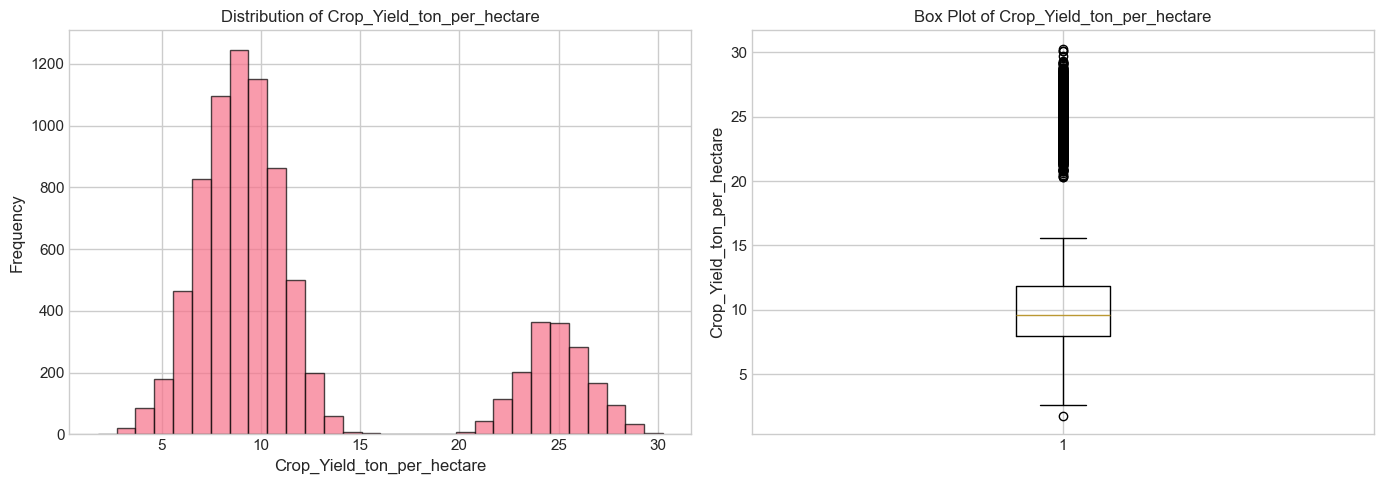


Skewness: 1.30
→ Target is highly skewed. Consider log transform in feature engineering.


In [60]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

### 3.2 Data Quality Checks

In [61]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
#
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)"

# YOUR CODE HERE:
duplicate_rows = df[df.duplicated()]
pct_duplicated = len(duplicate_rows)/len(df)
print(f"Duplicated rows: {len(duplicate_rows):,}, ({pct_duplicated:.2%})")

Duplicated rows: 0, (0.00%)


In [62]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values
#
# Hint: You can create a DataFrame with pd.DataFrame({'col1': series1, 'col2': series2})

# YOUR CODE HERE:
missing_cnt = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_cnt,
    'Missing %': missing_pct
})

# 4. Filter to display only columns that have missing values (Count > 0)
#    and sort by 'Missing %' in descending order
missing_df = missing_df[missing_df['Missing Count'] > 0]
missing_df = missing_df.sort_values(by='Missing %', ascending=False)

# 5. Display the result
print(missing_df)

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


In [63]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

✓ No missing values in the dataset!


### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

1. The target variable is not normally distributed. It has three peaks (normal distribution only has 1 peak) and the skewness is 1.59 (highly skewed).
2. Yes, there are outliers on both ends (high yeild and low yield).
3. This dataset has no missing values.
4. This dataset has no duplicates.
5. Interesting findings: 
   (1) Most of high yeild outliers are Sugarcane with abundant rainfall or heavy fertilizer usage; 
   (2) Most of low yeild outliers are Cotton with light rainfall and light fertilizer usage

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [64]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there
# 4. Print the count and list of numerical features
#
# Store result in: numerical_cols

# YOUR CODE HERE:
numerical_cols = df.select_dtypes(include=[np.number])
numerical_cols.drop(columns=['Crop_Yield_ton_per_hectare'], inplace=True)
col_names = numerical_cols.columns.tolist()
cnt = len(col_names)
print(f"There are {cnt} numberical columns. They are {col_names}")

There are 14 numberical columns. They are ['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Organic_Carbon', 'Temperature', 'Humidity', 'Rainfall', 'Sunlight_Hours', 'Wind_Speed', 'Altitude', 'Fertilizer_Used', 'Pesticide_Used']


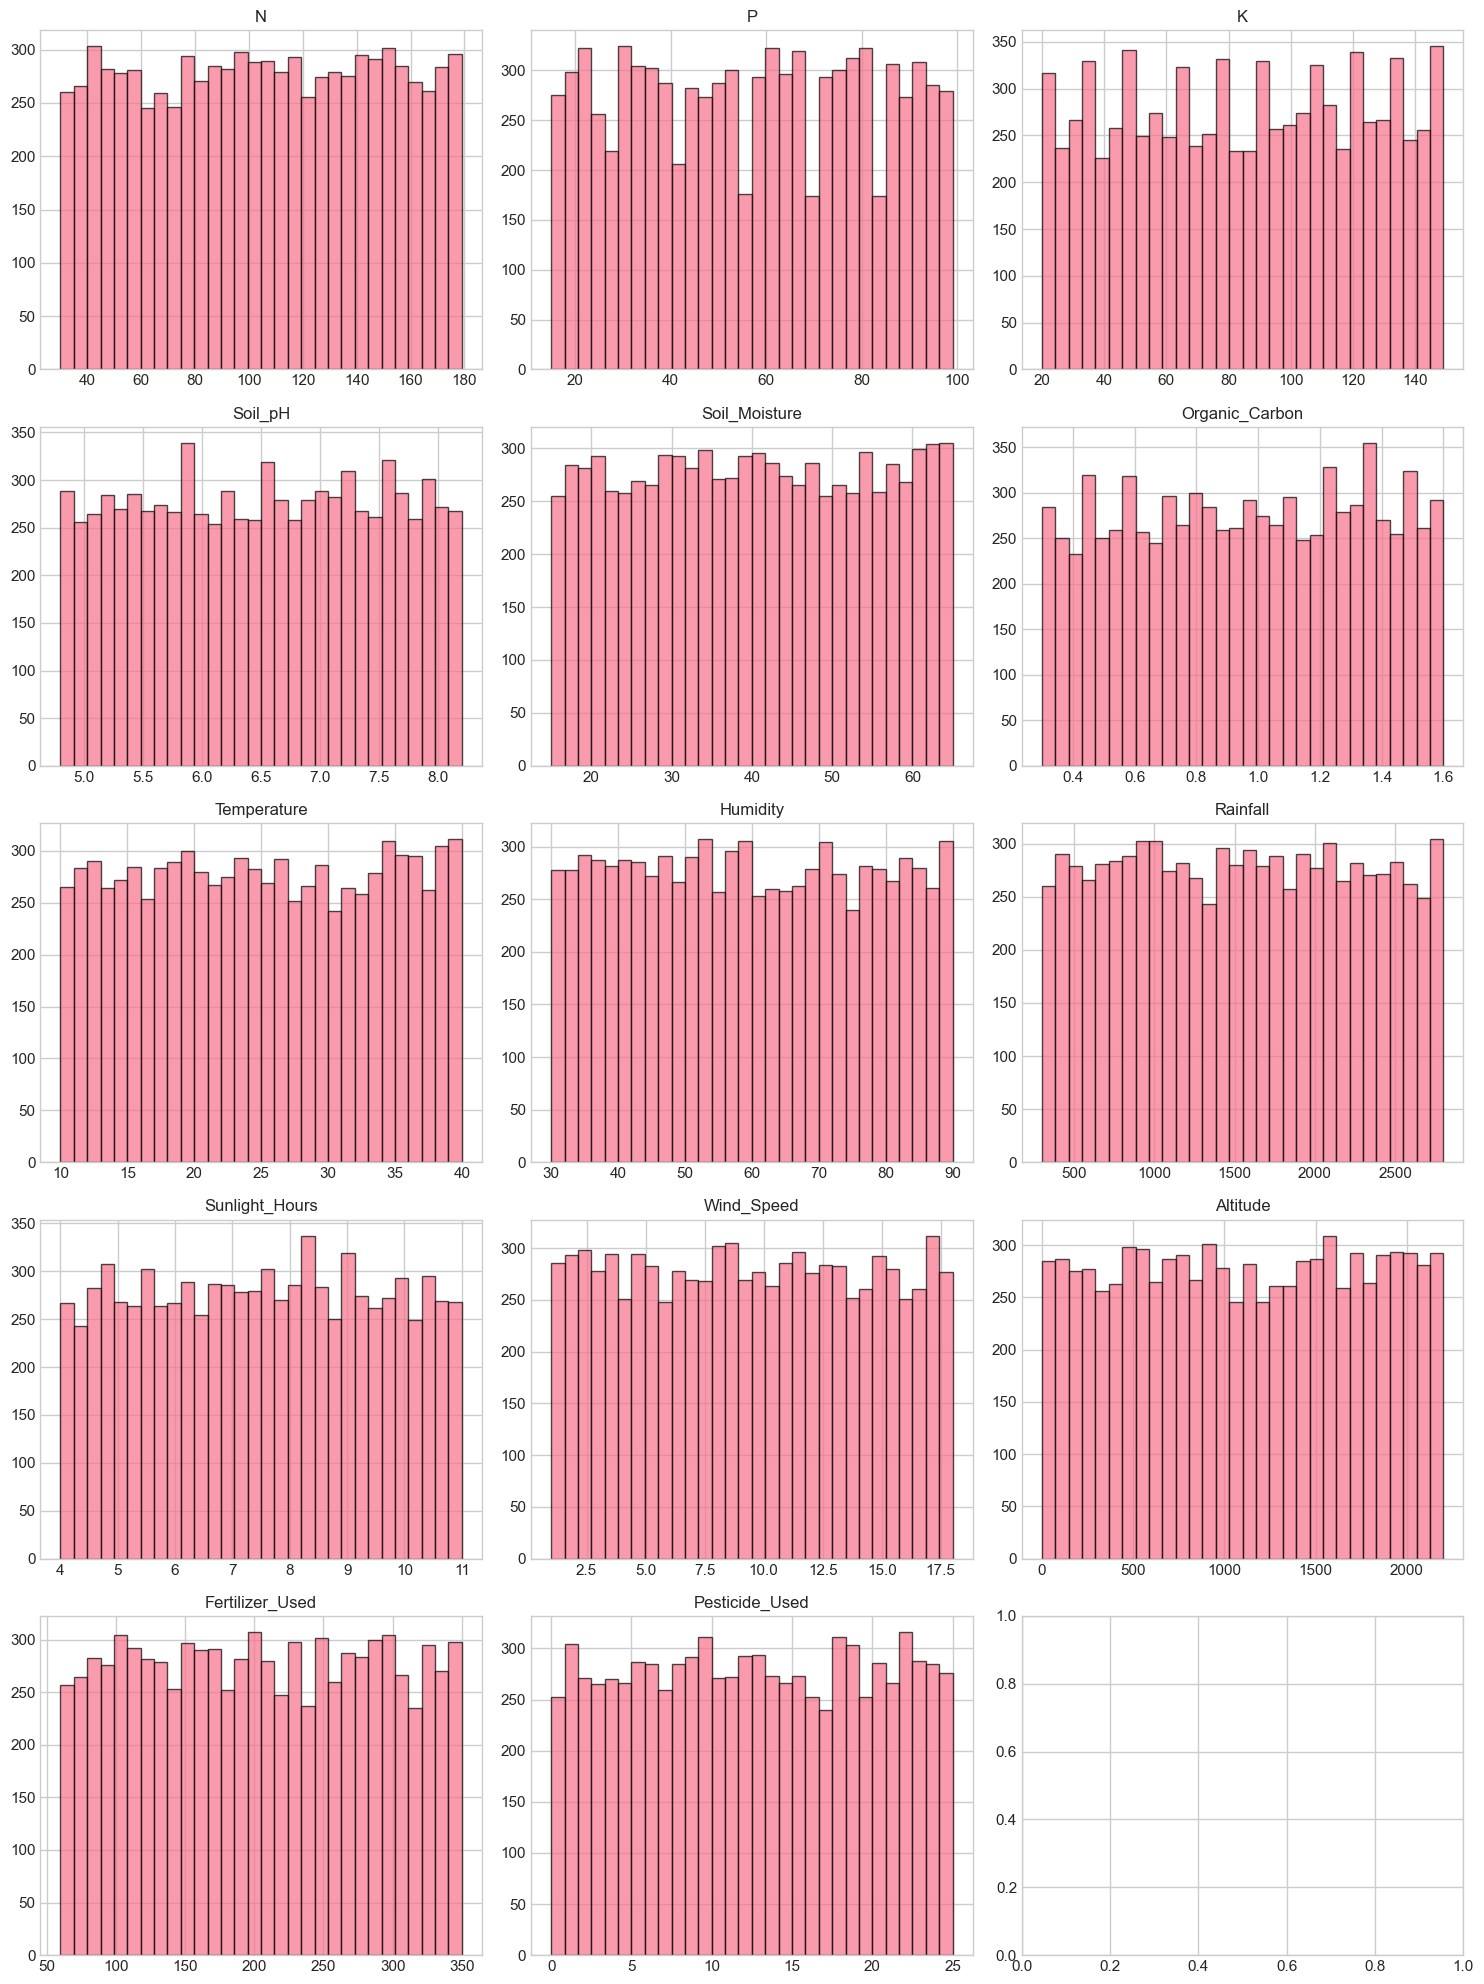

In [65]:
# Distribution of numerical features
if len(col_names) > 0:
    n_cols = 3
    n_rows = (len(col_names) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [66]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, print:
#    - Number of unique values: df[col].nunique()
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols
import warnings
warnings.filterwarnings('ignore')
# YOUR CODE HERE:
categorical_cols = df.select_dtypes(include=['object', 'category'])

col_names_cat = categorical_cols.columns.tolist()

cnt_cat = len(col_names_cat)

print(f"There are {cnt_cat} categorical columns in the dataset. They are {col_names_cat}")

for col in col_names_cat:
    print(f"Number of unique values in {col}: {df[col].nunique()}")
    print(df.groupby(col)[col].value_counts().head(10))  
          

There are 5 categorical columns in the dataset. They are ['Soil_Type', 'Region', 'Season', 'Crop_Type', 'Irrigation_Type']
Number of unique values in Soil_Type: 4
Soil_Type
Clay     2050
Loamy    2122
Sandy    2131
Silt     2064
Name: count, dtype: int64
Number of unique values in Region: 5
Region
Central    1653
East       1675
North      1713
South      1676
West       1650
Name: count, dtype: int64
Number of unique values in Season: 3
Season
Kharif    2804
Rabi      2786
Zaid      2777
Name: count, dtype: int64
Number of unique values in Crop_Type: 5
Crop_Type
Cotton    1666
Maize     1658
Potato    1670
Rice      1702
Wheat     1671
Name: count, dtype: int64
Number of unique values in Irrigation_Type: 4
Irrigation_Type
Canal        2111
Drip         2115
Rainfed      2116
Sprinkler    2025
Name: count, dtype: int64


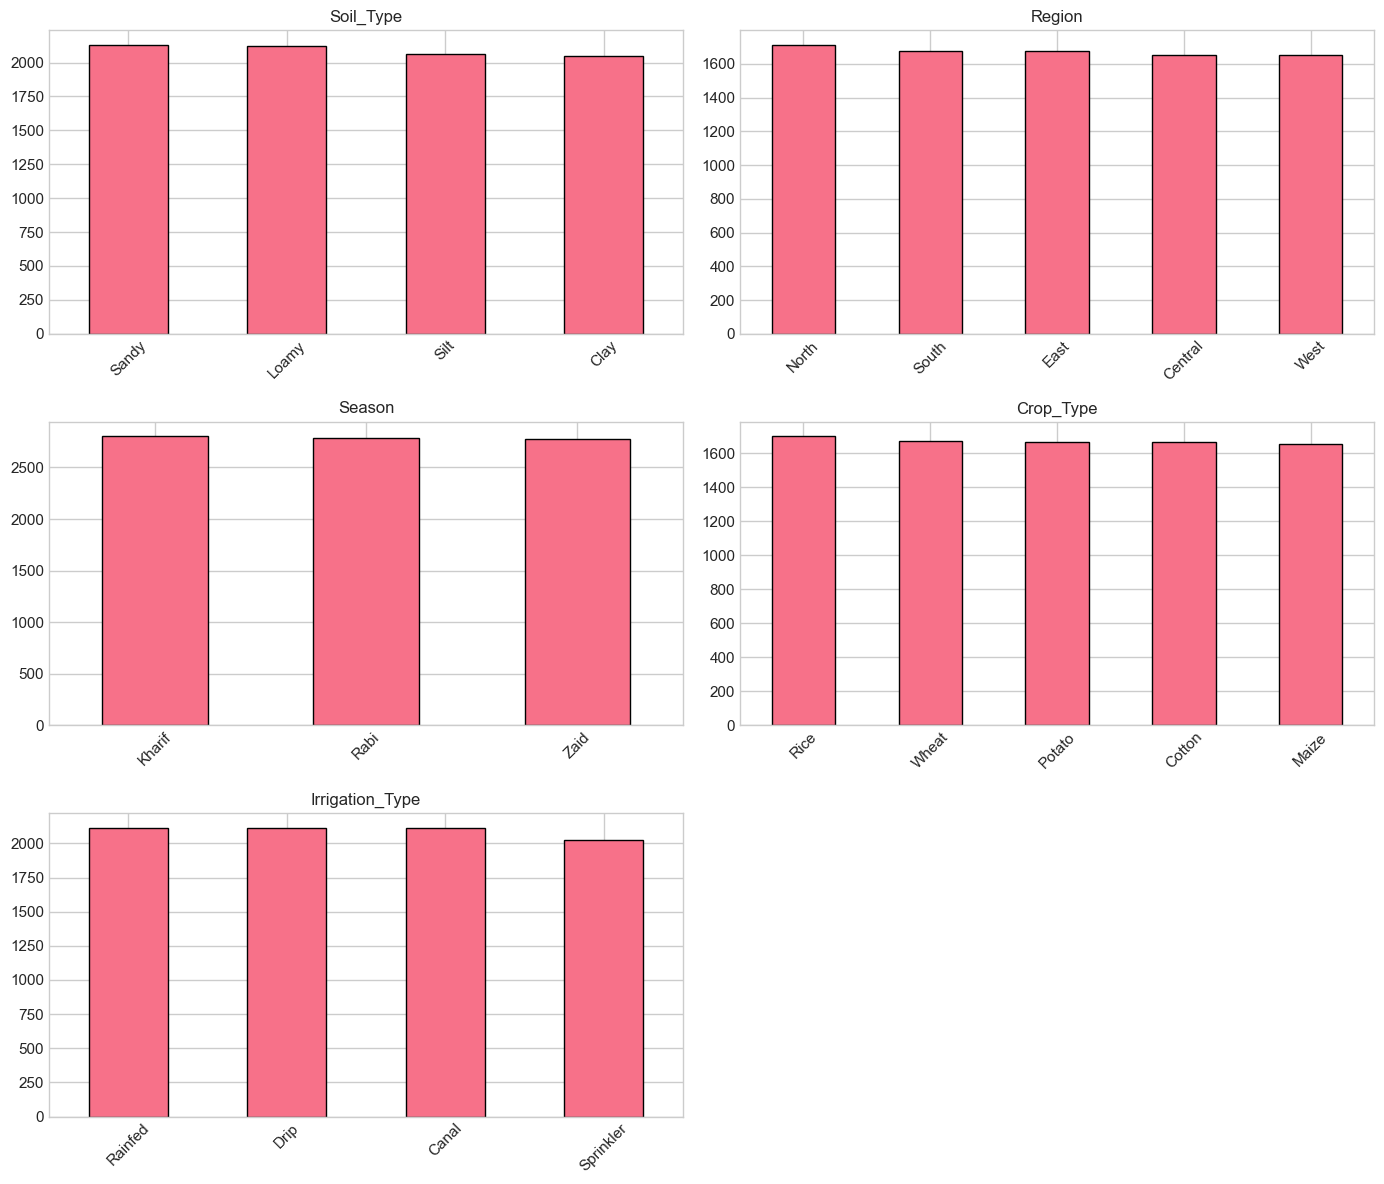

In [67]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 2
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

In [68]:
#!pip install seaborn

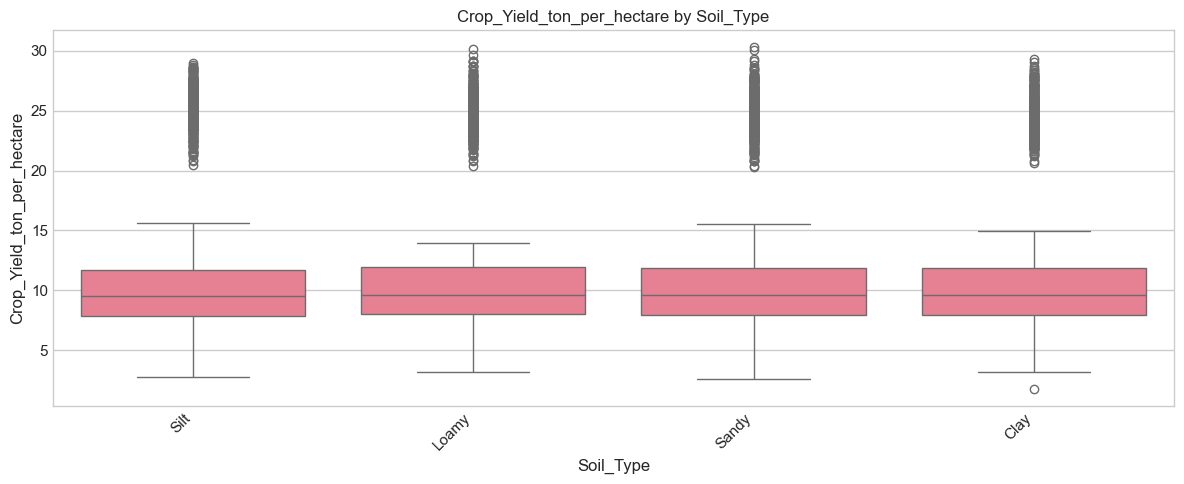


Mean Crop_Yield_ton_per_hectare by Soil_Type:
                mean  median  count
Soil_Type                          
Loamy      12.250316   9.585   2122
Sandy      12.091779   9.600   2131
Clay       12.061327   9.615   2050
Silt       11.987272   9.500   2064



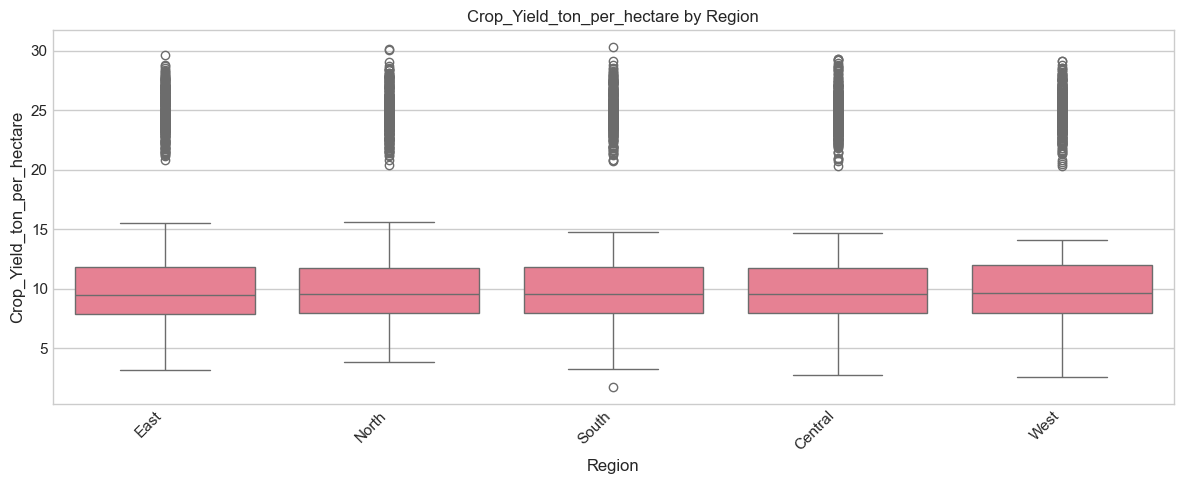


Mean Crop_Yield_ton_per_hectare by Region:
              mean  median  count
Region                           
West     12.246612   9.645   1650
Central  12.144676   9.590   1653
East     12.089899   9.500   1675
South    12.045609   9.570   1676
North    11.972633   9.560   1713



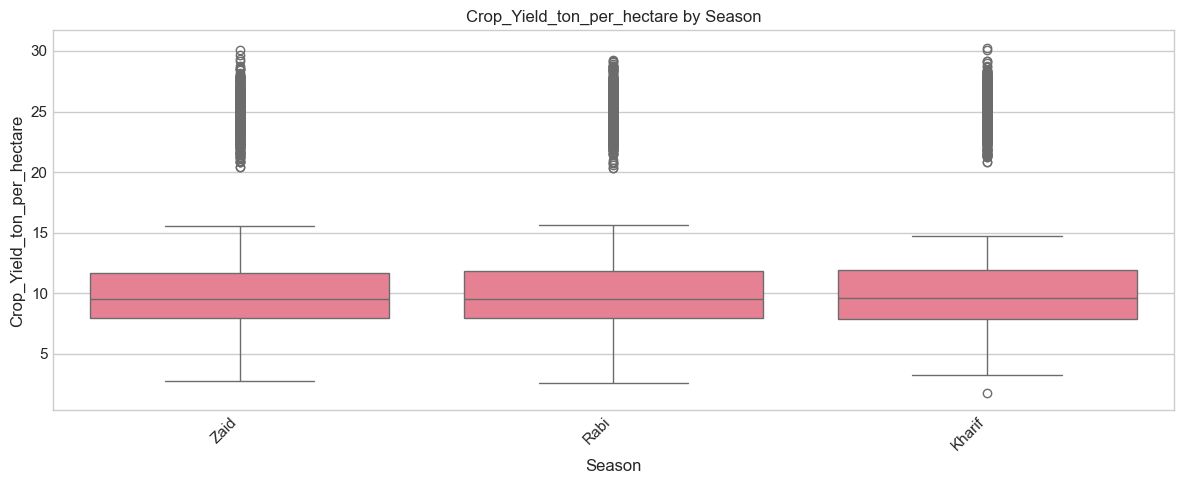


Mean Crop_Yield_ton_per_hectare by Season:
             mean  median  count
Season                          
Kharif  12.221887   9.615   2804
Rabi    12.172617   9.560   2786
Zaid    11.900295   9.540   2777



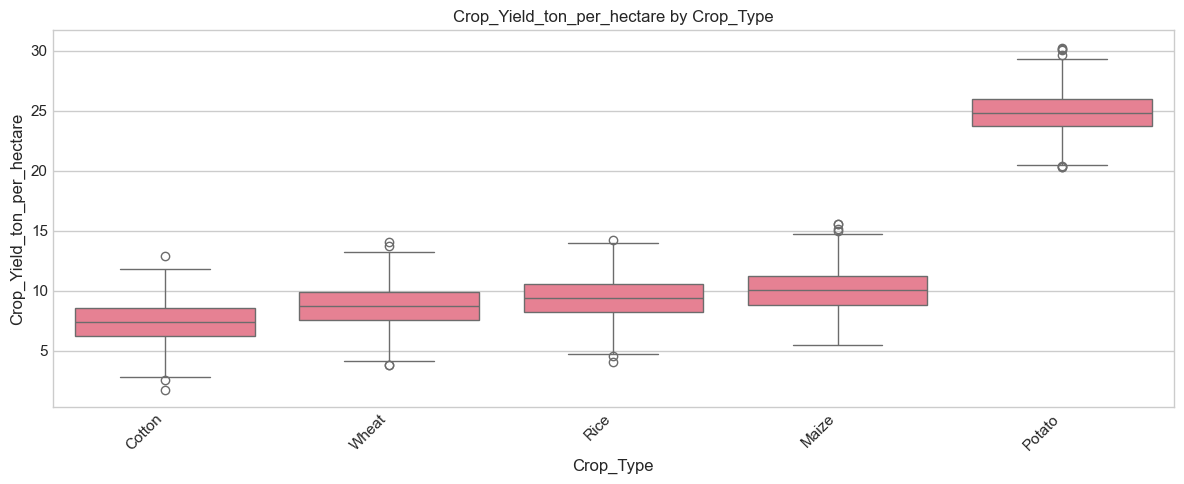


Mean Crop_Yield_ton_per_hectare by Crop_Type:
                mean  median  count
Crop_Type                          
Potato     24.891012  24.830   1670
Maize      10.076037  10.050   1658
Rice        9.402027   9.425   1702
Wheat       8.724680   8.740   1671
Cotton      7.427941   7.420   1666



In [69]:
import seaborn as sns
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

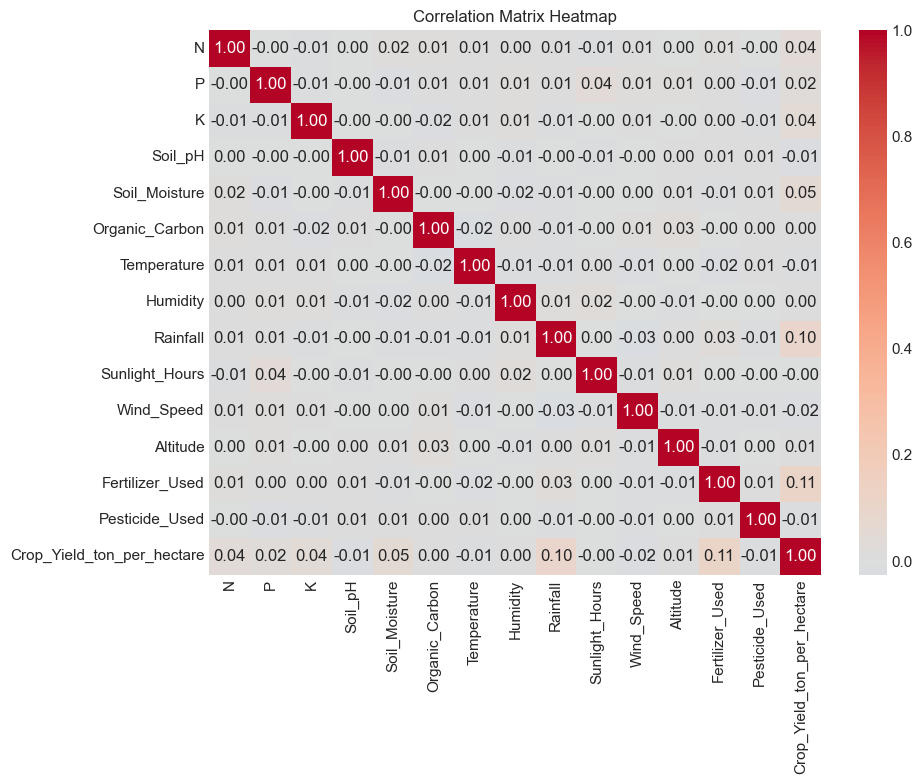

In [70]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr()
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix

# YOUR CODE HERE:
df_corr = pd.concat([numerical_cols, df['Crop_Yield_ton_per_hectare']], axis=1)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8)) # Optional: Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [71]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column from correlation_matrix
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)
#
# Store result in: target_correlations

# YOUR CODE HERE:
print(correlation_matrix.head())

TARGET = 'Crop_Yield_ton_per_hectare'

correlation_matrix.drop(TARGET, axis=0, inplace=True)

                      N         P         K   Soil_pH  Soil_Moisture  \
N              1.000000 -0.001527 -0.006939  0.000584       0.017426   
P             -0.001527  1.000000 -0.006566 -0.003379      -0.014187   
K             -0.006939 -0.006566  1.000000 -0.001580      -0.000183   
Soil_pH        0.000584 -0.003379 -0.001580  1.000000      -0.008663   
Soil_Moisture  0.017426 -0.014187 -0.000183 -0.008663       1.000000   

               Organic_Carbon  Temperature  Humidity  Rainfall  \
N                    0.014152     0.005266  0.004532  0.010447   
P                    0.008865     0.007048  0.011007  0.005680   
K                   -0.017088     0.009758  0.014846 -0.007005   
Soil_pH              0.006142     0.002248 -0.005919 -0.003324   
Soil_Moisture       -0.001765    -0.001853 -0.015227 -0.008486   

               Sunlight_Hours  Wind_Speed  Altitude  Fertilizer_Used  \
N                   -0.005925    0.005447  0.000001         0.012003   
P                    0.035

In [72]:
correlation_matrix.sort_values(by='Crop_Yield_ton_per_hectare', ascending=False, inplace=True)

print(correlation_matrix.iloc[:, -1:])

target_correlations = correlation_matrix.iloc[:, -1:]

                 Crop_Yield_ton_per_hectare
Fertilizer_Used                    0.112381
Rainfall                           0.101444
Soil_Moisture                      0.049000
K                                  0.044726
N                                  0.035323
P                                  0.022106
Altitude                           0.009145
Humidity                           0.004211
Organic_Carbon                     0.003588
Sunlight_Hours                    -0.002302
Pesticide_Used                    -0.006182
Temperature                       -0.012281
Soil_pH                           -0.013783
Wind_Speed                        -0.019873


This dataset does not have very strong numerical feature - target correlations. The highest correlation is between "Fertilizer_Used" and TARGET, the value is 0.11.

<Figure size 1000x600 with 0 Axes>

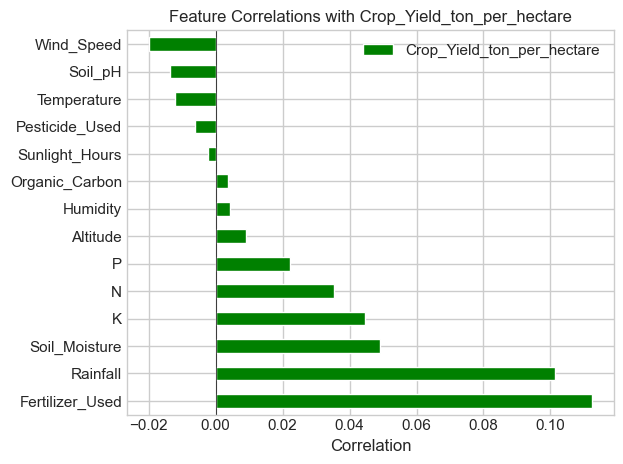

In [73]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))

colors = ['green' if c > 0 else 'red' for c in target_correlations['Crop_Yield_ton_per_hectare']]
#colors = np.where(target_correlations['Crop_Yield_ton_per_hectare'] >= 0, 'green', 'red')  
############# I tried several diffent methods but none can make the bar change color according to the correlation value #######################

target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

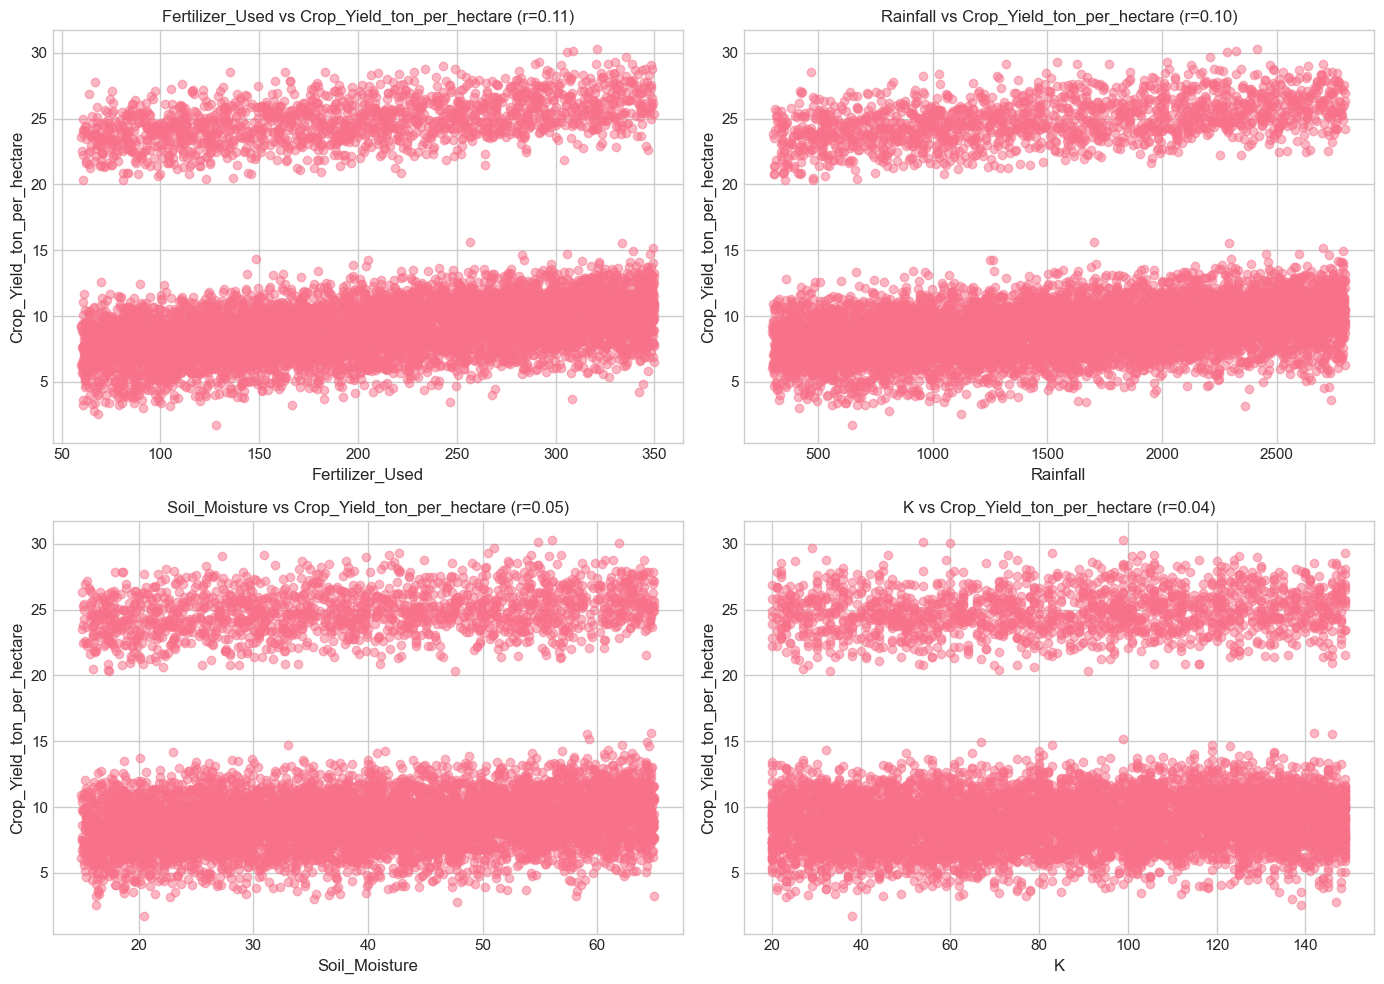

In [74]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(by='Crop_Yield_ton_per_hectare', ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

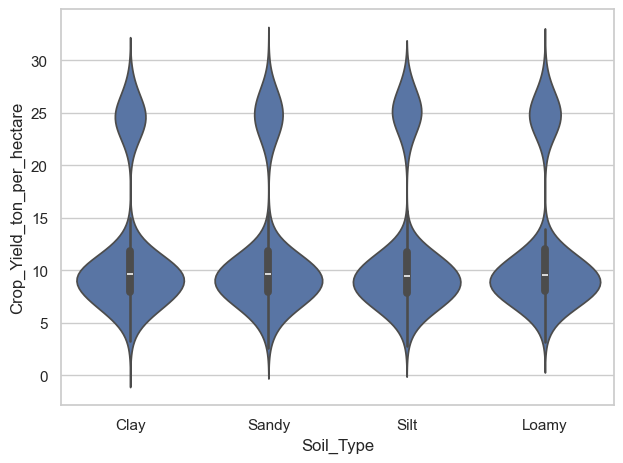

In [75]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!

# 1. Violin plots for Soil_Type vs target

sns.set(style = 'whitegrid') 
df_cat = pd.concat([categorical_cols, df['Crop_Yield_ton_per_hectare']], axis=1)
   
sns.violinplot(x ='Soil_Type', 
             y ="Crop_Yield_ton_per_hectare", 
             data = df_cat)

plt.tight_layout() 
plt.show()

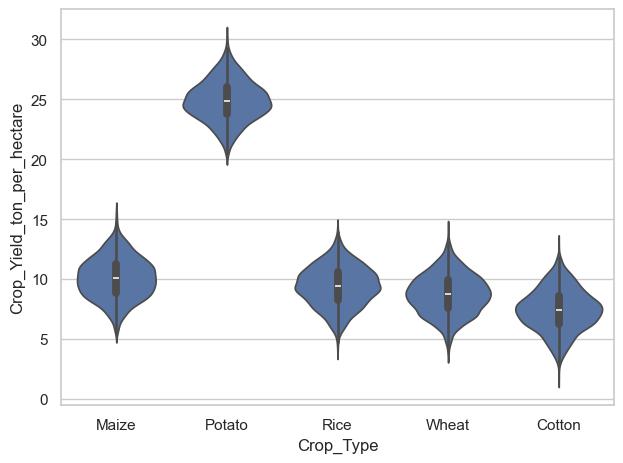

In [76]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!

# 2. Violin plots for Crop_Type vs target
   
sns.violinplot(x ='Crop_Type', 
             y ="Crop_Yield_ton_per_hectare", 
             data = df_cat)
plt.tight_layout()
plt.show()

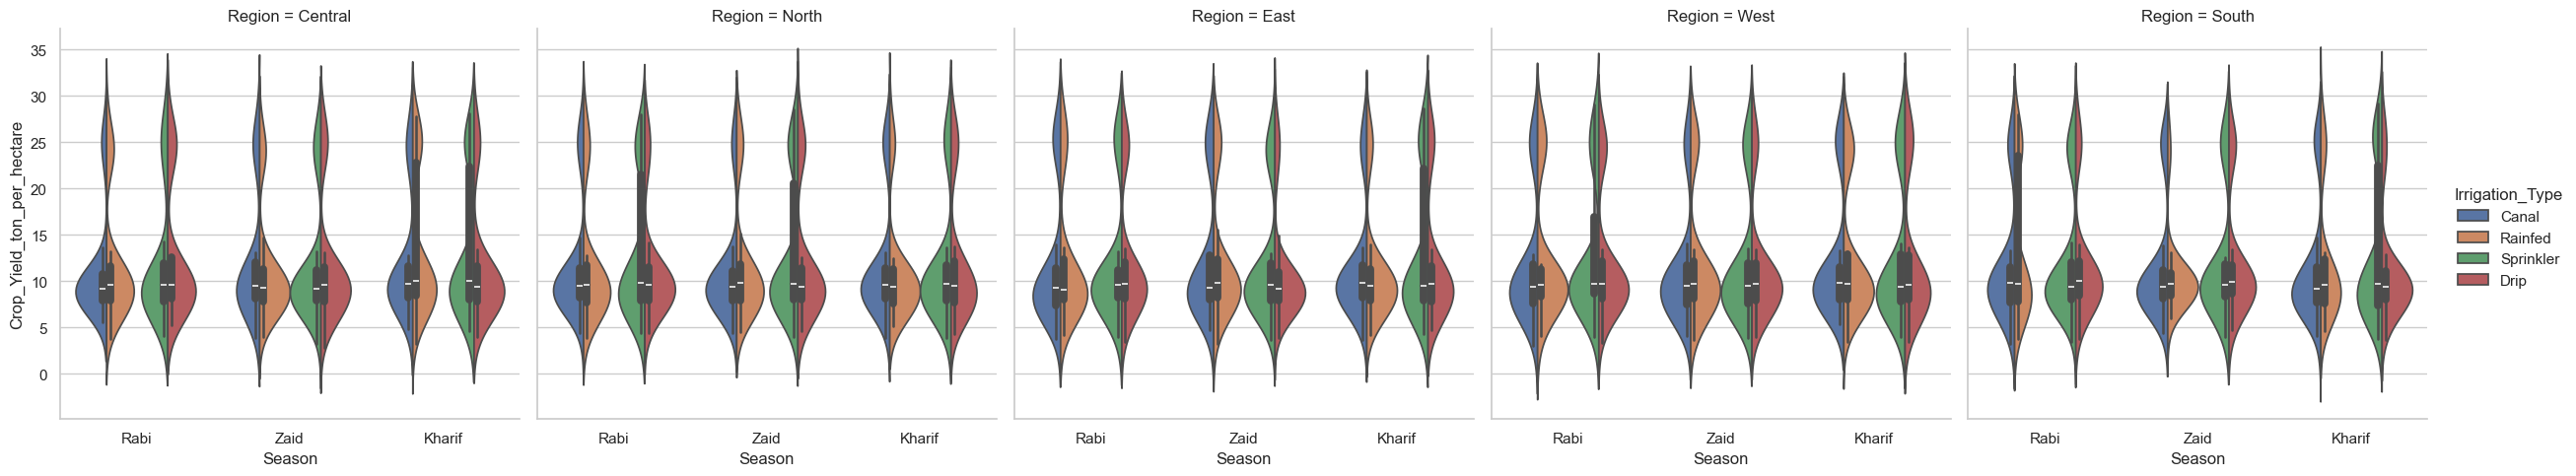

In [77]:


# Create a catplot with violin kind, the rest of categorical variables as X-axis, hue, column and TARGET on y-axis
sns.catplot(data=df_cat, 
            x="Season", 
            y="Crop_Yield_ton_per_hectare", 
            col="Region", 
            hue="Irrigation_Type", 
            kind="violin", 
            split=True)

plt.show()



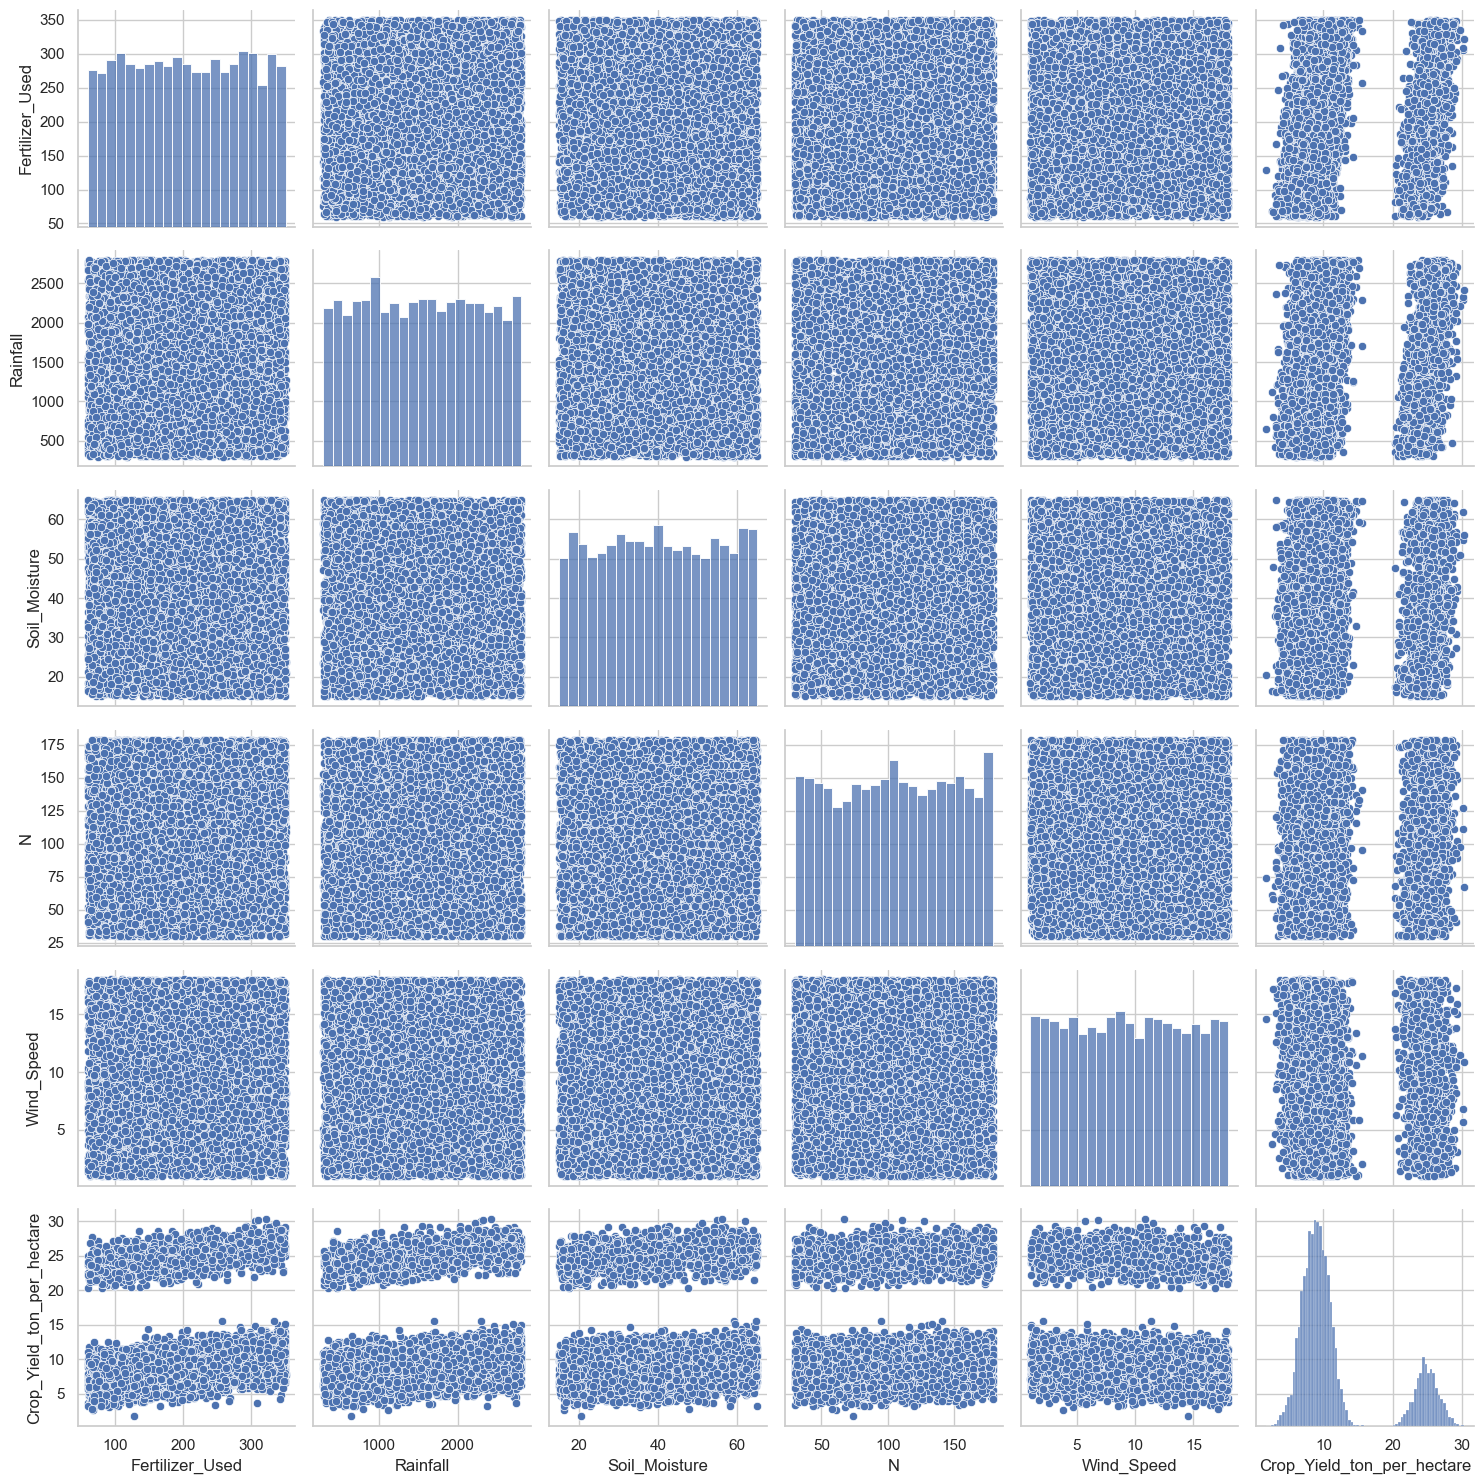

In [78]:
# 2. Look at feature interactions

sns.pairplot(df_corr[['Fertilizer_Used', 'Rainfall', 'Soil_Moisture', 'N', 'Wind_Speed', 'Crop_Yield_ton_per_hectare']])
plt.tight_layout()
plt.show()

**What additional insights did you discover?**

1. Crop_Type is an important feature for crop yield
2. Central & South Region at Rabi season crop yield is impacted by irrigation type - Canal & Drip irrigation produces higher yield
3. I did not find very strong correlation among numeric features (the highest correlation among numeric features is 0.03).

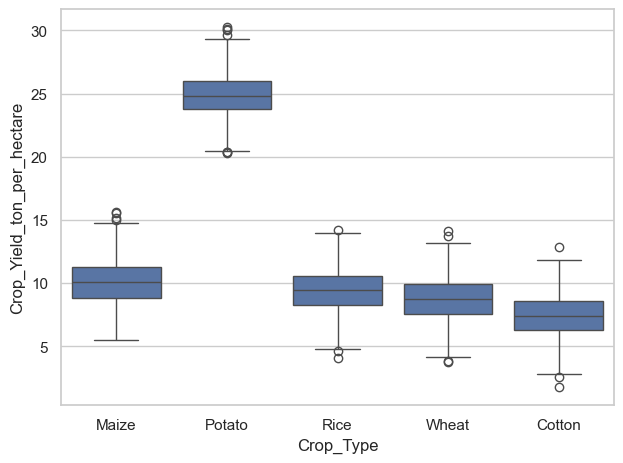

In [79]:
# check data distribution and outliers
sns.boxplot(x='Crop_Type', y='Crop_Yield_ton_per_hectare',data=df)
plt.tight_layout()
plt.show()

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?
- Which categorical features show the biggest differences in target?
- Are there any features that seem unimportant?
- Did you discover any interesting patterns or relationships?
- Are there any concerns about the data (outliers, skewness, etc.)?

**Your summary:**

1. Top 5 features that most correlated with target: Fertilizer_Used, Rainfall, Wind_Speed, Pesticide_Used, and Soul_pH.
2. Among categorical features, Crop_Type has the biggest impact on target.
3. Features like Organic_Carbon seem unimportant.
4. Crop_Type is the most important categorical feature, more important than Soil_Type, Season or Irrigation_Type.
5. The data is not normally distributed (skewness = 1.3). There are outliers at both lower end and higher end even after we take Crop_Type into account.

## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [80]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:

df_clean = df.copy()
print(f"Starting shape: {df_clean.shape}")

Starting shape: (8367, 20)


In [81]:
# revision 02.11.2026
# 1. Engineer Organic_Carbon_binned as a feature. Crop yield has a non-linear relationship with Organic Carbon (surprising to me).
# Too little organic carbon (SOC) in soil is bad for crop yield because it leads to nutrient depletion, reduced water retention, 
# starving plants of essential resources, ultimately resulting in stunted growth and lower productivity. 
# Too much organic carbon (SOC) isn't inherently bad; it's usually beneficial, but extreme levels, especially rapid increases from intense practices, 
# can cause issues like nitrogen immobilization (microbes using up available N), nutrient imbalances, poor soil structure, 
# increased salinity risk (especially with irrigation), and soil acidification, ultimately reducing crop yields by hindering nutrient availability 
# and creating poor growing conditions, though these problems often stem from management rather than the carbon itself. 

# after exploring, 0.5 is a good bin size for SOC

bin_size = 0.5
min_val = 0.0
max_val = 2.5
#print(max_val)
bins = np.arange(min_val, max_val, bin_size)
labels = [ '0.0', '0.5', '1.0', '1.5'] 
print(bins) #

df_clean['SOC_Binned'] = pd.cut(df_clean['Organic_Carbon'], bins=bins, labels=labels, include_lowest=True)

[0.  0.5 1.  1.5 2. ]


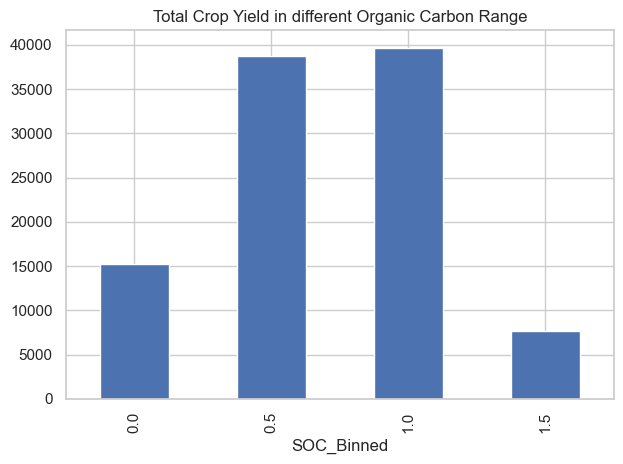

In [82]:
crop_yield_by_SOC = df_clean.groupby('SOC_Binned')['Crop_Yield_ton_per_hectare'].sum()
crop_yield_by_SOC.plot(kind='bar', title='Total Crop Yield in different Organic Carbon Range')
plt.tight_layout()
plt.show()

In [83]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = missing_df[missing_df['Missing %'] > 50].index.tolist()
print(f"\n1. >50% missing values: {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower() or 'url' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in categorical_cols if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")

Columns to consider dropping:

1. >50% missing values: []

2. Potential ID/URL columns: ['Humidity', 'Pesticide_Used']

3. High cardinality (>100 unique): []

4. Low variance (>95% same value): []


In [84]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

# We will use 'Temperature_binned' to replace 'Temperature', 
# 'Humidity_binned' to replace 'Humidity' 
# and 'Pesticide_Binned' to replace 'Pesticide_Used'
# we can drop the original 'Temperature',  'Humidity' , 'Pesticide_Used columns

columns_to_drop = [
    # Add column names to drop here, e.g.:
    #'Soil_Moisture',
    'Organic_Carbon'
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

Dropped 1 columns: ['Organic_Carbon']
New shape: (8367, 20)


**Explain which columns you dropped and why:**

We dropped the column ['Organic_Carbon'] that we feature engineered into a categorical column. 

### 5.2 Handle Duplicate Rows

In [85]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:
row_cnt_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
row_cnt_after = len(df_clean)

print(f"Number of duplicate rows removed: {row_cnt_after - row_cnt_before} ")

Number of duplicate rows removed: 0 


### 5.3 Handle Missing Values

In [86]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

Missing values before handling:
Series([], dtype: int64)


In [87]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:

# this dataset has no missing values


In [88]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values after cleaning: 0


**Explain your missing value strategy:**

This dataset has no missing values. I did not need to deploy any fillna strategy.

### 5.4 Handle Outliers (if needed)

In [89]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

Outlier analysis:
Crop_Yield_ton_per_hectare: 1,671 outliers (20.0%) | bounds: [2.11, 17.66]


In [90]:
df_clean['Crop_Yield_ton_per_hectare'].min()

np.float64(1.76)

In [91]:
df_clean['Crop_Yield_ton_per_hectare'].max()

np.float64(30.27)

In [92]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)

# YOUR CODE HERE:
#df_clean = df_clean[df_clean['Crop_Yield_ton_per_hectare'] >= 0]
#df_clean = df_clean[df_clean['Crop_Yield_ton_per_hectare'] <= 15]


**Explain your outlier handling strategy (or why you kept them):**

We decided to keep all the data because although there are high yields outside the upper-bound and low yields outside the lower-bound, these are mainly heavy crops such as Potatos (higher end) and light crops such as Cotton (lower yield). We need to keep them to predict these crops accurately. 

### 5.5 Data Type Corrections

In [93]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

Current data types:
N                                int64
P                                int64
K                                int64
Soil_pH                        float64
Soil_Moisture                  float64
Soil_Type                       object
Temperature                    float64
Humidity                       float64
Rainfall                       float64
Sunlight_Hours                 float64
Wind_Speed                     float64
Region                          object
Altitude                         int64
Season                          object
Crop_Type                       object
Irrigation_Type                 object
Fertilizer_Used                float64
Pesticide_Used                 float64
Crop_Yield_ton_per_hectare     float64
SOC_Binned                    category
dtype: object


In [94]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:

# no data type issue


## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [95]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:

df_clean['Normalize_Rainfall_by_Windspeed'] = df_clean['Rainfall']/df_clean['Wind_Speed']

'SOC_Binned' is a new feature engineered from 'Organic_Carbon'

**Explain your new features:**

Rainfall and Wind_Speed are both in the top 5 predictors but there seem to be a weak relationship between them (correlation = 0.03). We want to use a normalized feature to minimize this interaction.

We also created SOC_Binned to better capture the non-linear relationships between Organic Carbon and the target: it has this middle is the best while both ends hurt the crop growth character. i.e., too little SOC is not good for crop yield while too much SOC will hurt crop growth too.

### 6.2 Encode Categorical Variables

In [96]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:
cat_cols = df_clean.select_dtypes(include=['object', 'category'])
col_names = cat_cols.columns.tolist()

for col in col_names:
    value_cnt = df_clean[col].nunique()
    print(f"Categorical column name: {col}, number of unique values: {value_cnt} ")

Categorical column name: Soil_Type, number of unique values: 4 
Categorical column name: Region, number of unique values: 5 
Categorical column name: Season, number of unique values: 3 
Categorical column name: Crop_Type, number of unique values: 5 
Categorical column name: Irrigation_Type, number of unique values: 4 
Categorical column name: SOC_Binned, number of unique values: 4 


In [97]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])

# YOUR CODE HERE:
df_clean = pd.get_dummies(df_clean, columns=col_names, dtype=int, drop_first=True)


**Explain your encoding strategy:**

I used one-hot encoding because the categorical columns only had 3, or 4 or 5 unique values, and there is no cardinality in any of the columns.

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [98]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!



**Explain your additional feature engineering:**

[Describe any additional features you created and your reasoning]

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [99]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:
num_cols = df_clean.select_dtypes(include=[np.number])
num_cols.drop(columns=['Crop_Yield_ton_per_hectare'], inplace=True)
num_col_names = num_cols.columns.tolist()

numerical_features = {}

for col in num_col_names:
    numerical_features['column_name'] = col
    numerical_features['min'] = df_clean[col].min()
    numerical_features['max'] = df_clean[col].max()
    numerical_features['range'] = (df_clean[col].max() - df_clean[col].min())

### 6.5 Final Sanity Checks

In [100]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

FINAL DATA QUALITY CHECKS

1. Shape: 8,367 rows, 34 columns
   (Started with 8,367 rows, 20 columns)

2. Missing values: 0

3. Duplicate rows: 0

4. Target variable 'Crop_Yield_ton_per_hectare':
   - Min: 1.76
   - Max: 30.27
   - Mean: 12.10

5. Data types:
   - Numerical: 34
   - Categorical: 0

✓ All features are numerical. Ready for modeling!


### 6.6 Save Processed Data

In [101]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

Final cleaned dataset:
Shape: (8367, 34)

Columns (34):
['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Temperature', 'Humidity', 'Rainfall', 'Sunlight_Hours', 'Wind_Speed', 'Altitude', 'Fertilizer_Used', 'Pesticide_Used', 'Crop_Yield_ton_per_hectare', 'Normalize_Rainfall_by_Windspeed', 'Soil_Type_Loamy', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'Season_Rabi', 'Season_Zaid', 'Crop_Type_Maize', 'Crop_Type_Potato', 'Crop_Type_Rice', 'Crop_Type_Wheat', 'Irrigation_Type_Drip', 'Irrigation_Type_Rainfed', 'Irrigation_Type_Sprinkler', 'SOC_Binned_0.5', 'SOC_Binned_1.0', 'SOC_Binned_1.5']

Data types:
N                                    int64
P                                    int64
K                                    int64
Soil_pH                            float64
Soil_Moisture                      float64
Temperature                        float64
Humidity                           float64
Rainfall                           float64


In [102]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

✓ Cleaned data saved to ../data/processed/cleaned_data.csv


### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

- 1. Columns dropped
Three columns ['Temperature', 'Pesticide_Used', 'Humidity'] were dropped from the df_clean dataset:
Justification: “very low predictive value” based on correlation analysis / EDA. 

- 2. Duplicate rows removed
•	Counted duplicates using df[df.duplicated()] and computed the duplicate percentage.
•	Observation: no duplicates in the raw dataset (0%). 

- 3. Missing values handled
•	Computed missing counts and missing percentages for each column.
•	Built a missing_df table (count + %) and filtered to only columns with missing values.
•	Observation: no missing values present (so no imputation or row dropping was needed). 

- 4. Outliers addressed 
•	We used IQR method to determine TARGET lower bound was 3.48 and higher bound was 14.36.
•	We decided to keep all the data regardless if they are outside the bounds because the nature of heavy/light crops (such as potato vs cotton) makes the "crop yield ton per hectare" spead out more widely. We need all the data points to predict the target accurately.

- 5. Data type corrections
•	We printed df_clean.dtypes.
•	We decided that there were no data type issues and did not cast any columns. 

- 6. New features created
Four engineered features:
(1) df_clean['Normalize_Rainfall_by_Windspeed'] = df_clean['Rainfall'] / df_clean['Wind_Speed']
were added to capture a combined effect / normalized relationship between Rainfall and Wind_Speed
(2) SOC_Binned - from df_clean['Organic_Carbon'], range of Organic Carbon values

- 7. Categorical variables encoded
•	We identified categorical columns in df_clean via select_dtypes(include=['object', 'category']).
•	One-hot encoded them with: df_clean = pd.get_dummies(df_clean, columns=col_names, dtye=int, drop_first=True) 

- 8. Data saved to the processed folder:
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False) 



**Final feature list for modeling:**

Final cleaned dataset:
Shape: (8367, 34)

Columns (34):
['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Temperature', 'Humidity', 'Rainfall', 'Sunlight_Hours', 'Wind_Speed', 'Altitude', 'Fertilizer_Used', 'Pesticide_Used', 'Crop_Yield_ton_per_hectare', 'Normalize_Rainfall_by_Windspeed', 'Soil_Type_Loamy', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'Season_Rabi', 'Season_Zaid', 'Crop_Type_Maize', 'Crop_Type_Potato', 'Crop_Type_Rice', 'Crop_Type_Wheat', 'Irrigation_Type_Drip', 'Irrigation_Type_Rainfed', 'Irrigation_Type_Sprinkler', 'SOC_Binned_0.5', 'SOC_Binned_1.0', 'SOC_Binned_1.5']


---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---